<a href="https://colab.research.google.com/github/Harrison25000/DOSA_dontworrybehappy/blob/dt_overfitting/solving_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Expression Recognition #
***
### Introduction###
***

This is a notebook which explores the FER dataset from the following kaggle competition: 
<br>
<br>
(https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data).
<br>
<br>
We attempt to use various machine-learning techniques to create a classification of the human, facial expressions provided by our labelled image data. Once a sufficiently accurate model has been trained, we will attempt to build an object-detection program that can classify expressions in real-time from a webcameras video data. 
<br> 
<br>
This may or may not be later deployed as a web application!


### Process ###
***

  1. **Import the csv data into a pandas dataframe**
     <br>
  
  2. **Examine the data**
     - Check data distribution across categories 
     - Check for null values in the data set 
     - Plot a random sample of images to check that the labelling aligns with the images 
     <br>
     <br>
  3. **Format and preprocess the image data** 
     - Convert raw pixel string to list 
     - Normalize the pixel values using sklearn's StandardScaler
     - Reshape the data to 48x48 
     <br>
     <br>
    
  4. **Encode the labels using One-Hot Encoding** 
      - Our 7 categories of emotions were converted to 6 One-Hot Encoded labels 
          - The importance of using One-Hot Encoding is to ensure the model does not try to create inferences from the varying values of label data. 
          - The reason we used 6 dummy variables instead of the full 7 was to ensure that none of the explanatory variables in our model were, a priori, linearly dependent. This reduces the risk of multicollinearity in the model. 
     <br>
     <br>
     
  5. **Split the dataset into a testing and training dataset**
     <br>
     <br>
     
  6. **Fit sklearn models to the dataset**
     - Fine-Tune Hyper-parameters
     <br>
     <br>
     
  7. **Neural Network**
     - Fine-Tune Hyper-parameters
     <br>
     <br>
  8. **Object Reconition**
     - Stretch Goal

<br>
<br>

### The Code ###
***

##### Firstly we import the requsite libraries ####

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import io
import seaborn as sns 

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/fer2013.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##### Import the data and examine the head of the dataframe #####
###### We also clear the 'Disgust' emotion data ######

In [3]:
print(df.head())
print()
length = len(df)
print(f"Number of Observations: {length}" )

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

Number of Observations: 35887


##### Examine observation count  grouped by category and null value count #####

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


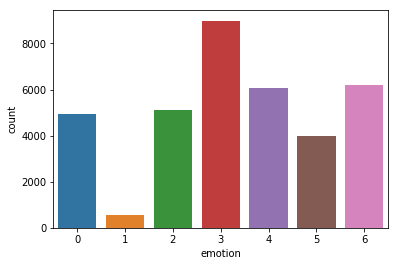

In [4]:
graph = sns.countplot(df['emotion'])
print(df.emotion.value_counts(sort=True))

 (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

In [5]:
# Check null values
print(df.isnull().sum())
df = df[df.emotion != 1].reset_index()

emotion    0
pixels     0
Usage      0
dtype: int64


It is clear that we have very few obervations for emotion 1 (Disgust), this is something to be mindful of. It might be worth dropping this emotion from the dataset. 
<br> 
<br> 
The good news is that we have no null values! :-) 
<br> 
##### Examine the datatypes of the pandas dataframe #####

In [6]:
df.dtypes

index       int64
emotion     int64
pixels     object
Usage      object
dtype: object

<font color=B22222>**This has presented a problem, our pixel data, which should be a list of intergers is actually a pandas 'object' datatype. This is equivalent to a python string datatype and will not work with machine learning algorithms.**</font>
<br>
<br>
Below we create a format function to convert this column of space-seperated strings to lists of intergers. This new data is used to create a new `pixel_formatted` dataframe column.

In [0]:
scaler = StandardScaler()

def format(index):
    elem = [int(s) for s in df['pixels'][index].split(' ')]
    return elem

In [8]:
arr = []

for i in tqdm(range(35340)):
    arr.append(format(i))
    
np_arr = np.asarray(arr)
standard_arr =  scaler.fit_transform(np_arr)
df['formatted_pixels'] = arr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


##### Remove the original `pixels` and `Usage` columns #####

In [0]:
df.drop(['pixels', 'Usage'], axis=1, inplace=True)

In [10]:
df.head()

,index,emotion,formatted_pixels
0,0,0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4..."
1,1,0,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ..."
2,2,2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ..."
3,3,4,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2..."
4,4,6,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23..."


##### Explore the images by visualising 6 random images ##### 

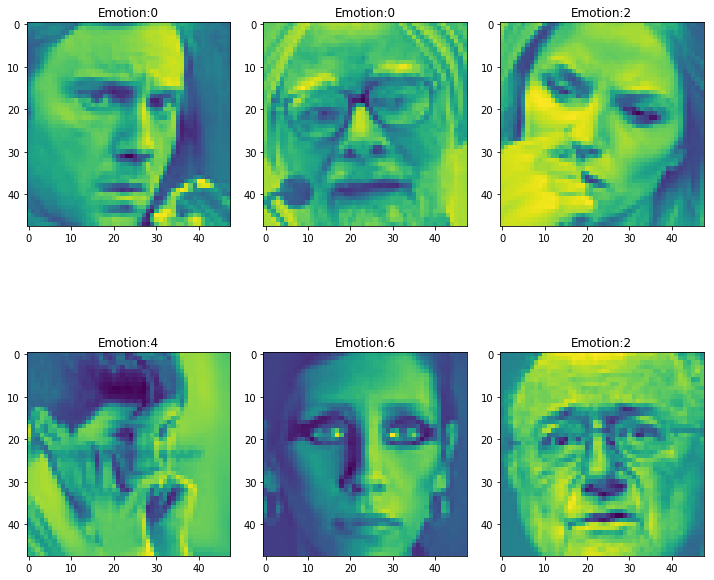

In [11]:
nrows, ncols = 2, 3 
figsize = [10, 10]     

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

counter = 0 
for i, axi in enumerate(ax.flat):
    img = standard_arr[counter].reshape(48,48)
    axi.imshow(img)
    rowid = i // ncols
    colid = i % ncols
    axi.set_title("Emotion:"+str(df['emotion'][counter]))
    counter += 1 

plt.tight_layout(True)
plt.show()

##### Now we are happy with our image data, we must One-Hot Encode out lables #####

In [12]:
ohe = OneHotEncoder(sparse=False, categories='auto')
onehotlabels = ohe.fit_transform(np.asarray(df['emotion']).reshape(-1,1))
shape = onehotlabels.shape
print(f"The shape of the onehot labels is: {shape}")

new_arr = [] 
for s in tqdm(standard_arr):
    new_arr.append(s.reshape(48,48,1))
    

The shape of the onehot labels is: (35340, 6)


##### Check that the pixel data now represents 35340 images of 48x48 pixels #####

In [13]:
shape = np.asarray(new_arr).shape
print(f"The shape of the pixel data matrix is: {shape}")

The shape of the pixel data matrix is: (35340, 48, 48, 1)


##### Examine the first two One-Hot Labels and check that shape of the label array #####

In [14]:
print(onehotlabels[:2])
print()
shape = np.asarray(onehotlabels).shape
print(f"The shape of the label matrix is: {shape}")

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]

The shape of the label matrix is: (35340, 6)


##### Both the input data and the labels have the same shape, so we can split our data into a training set and a testing set #####

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Slightly unbalanced => stratify = True
X_train, X_test, y_train, y_test = train_test_split(np.asarray(new_arr), onehotlabels, test_size=0.33, random_state=42)

In [17]:
X_train_shape, y_train_shape = X_train.shape, y_train.shape
print(f"The shape of the training pixel data is {X_train_shape}")
print(f"The shape of the training label data is {y_train_shape}")

The shape of the training pixel data is (23677, 48, 48, 1)
The shape of the training label data is (23677, 6)


# CNN #

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=3, input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    height_shift_range=0.1,
    width_shift_range=0.1,
    horizontal_flip=True
)

Epoch 1/10
739/739 [==============================] - 21s 29ms/step - loss: 1.6729 - acc: 0.3152 - val_loss: 1.4513 - val_acc: 0.4253
Epoch 2/10
739/739 [==============================] - 21s 29ms/step - loss: 1.5111 - acc: 0.3986 - val_loss: 1.4195 - val_acc: 0.4348
Epoch 3/10
739/739 [==============================] - 20s 27ms/step - loss: 1.4546 - acc: 0.4249 - val_loss: 1.3125 - val_acc: 0.4827
Epoch 4/10
739/739 [==============================] - 20s 27ms/step - loss: 1.4204 - acc: 0.4403 - val_loss: 1.2603 - val_acc: 0.5036
Epoch 5/10
739/739 [==============================] - 21s 29ms/step - loss: 1.3924 - acc: 0.4528 - val_loss: 1.2426 - val_acc: 0.5077
Epoch 6/10
739/739 [==============================] - 21s 29ms/step - loss: 1.3756 - acc: 0.4576 - val_loss: 1.2312 - val_acc: 0.5186
Epoch 7/10
739/739 [==============================] - 20s 27ms/step - loss: 1.3566 - acc: 0.4689 - val_loss: 1.2206 - val_acc: 0.5221
Epoch 8/10
739/739 [==============================] - 20s 27ms

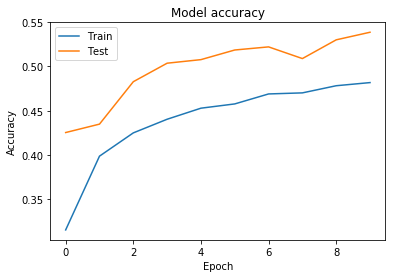

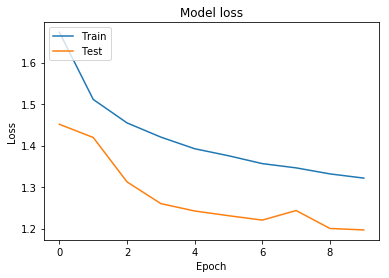

In [40]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                    epochs = 10,
                    steps_per_epoch = X_train.shape[0]//32,
                    verbose=1,
                    validation_data=(X_test, y_test)
                   )

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/30
369/369 [==============================] - 10s 28ms/step - loss: 1.2917 - acc: 0.4956 - val_loss: 1.1564 - val_acc: 0.5519
Epoch 2/30
369/369 [==============================] - 10s 28ms/step - loss: 1.2882 - acc: 0.4960 - val_loss: 1.1780 - val_acc: 0.5409
Epoch 3/30
369/369 [==============================] - 10s 28ms/step - loss: 1.2853 - acc: 0.4951 - val_loss: 1.1731 - val_acc: 0.5423
Epoch 4/30
369/369 [==============================] - 10s 28ms/step - loss: 1.2796 - acc: 0.5005 - val_loss: 1.1656 - val_acc: 0.5458
Epoch 5/30
369/369 [==============================] - 10s 28ms/step - loss: 1.2805 - acc: 0.4978 - val_loss: 1.1471 - val_acc: 0.5517
Epoch 6/30
369/369 [==============================] - 10s 27ms/step - loss: 1.2780 - acc: 0.5008 - val_loss: 1.1659 - val_acc: 0.5403
Epoch 7/30
369/369 [==============================] - 10s 27ms/step - loss: 1.2770 - acc: 0.4977 - val_loss: 1.1541 - val_acc: 0.5490
Epoch 8/30
369/369 [==============================] - 11s 29ms

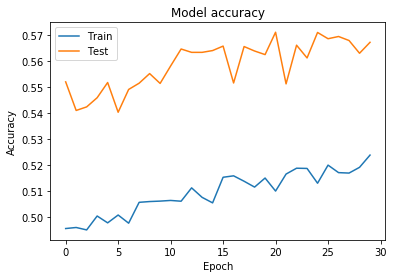

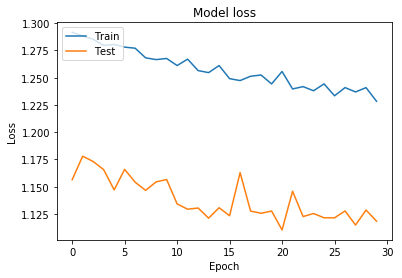

In [42]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                    epochs = 30,
                    steps_per_epoch = X_train.shape[0]//64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                   )

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

In [82]:
from keras.layers import MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

nb_classes = 6

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

epochs = 50

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
       epochs = epochs, steps_per_epoch = X_train.shape[0]//32,
       validation_data = (X_test,y_test), callbacks=[annealer], verbose=1)


Epoch 1/50
739/739 [==============================] - 25s 34ms/step - loss: 1.7912 - acc: 0.2802 - val_loss: 1.5633 - val_acc: 0.3764
Epoch 2/50
739/739 [==============================] - 22s 29ms/step - loss: 1.5356 - acc: 0.3881 - val_loss: 2.1305 - val_acc: 0.3497
Epoch 3/50
739/739 [==============================] - 21s 29ms/step - loss: 1.3879 - acc: 0.4503 - val_loss: 1.3076 - val_acc: 0.4879
Epoch 4/50
739/739 [==============================] - 22s 30ms/step - loss: 1.3110 - acc: 0.4831 - val_loss: 1.1686 - val_acc: 0.5428
Epoch 5/50
739/739 [==============================] - 21s 29ms/step - loss: 1.2614 - acc: 0.5085 - val_loss: 1.1643 - val_acc: 0.5422
Epoch 6/50
739/739 [==============================] - 21s 29ms/step - loss: 1.2245 - acc: 0.5205 - val_loss: 1.0830 - val_acc: 0.5806
Epoch 7/50
739/739 [==============================] - 21s 29ms/step - loss: 1.1937 - acc: 0.5352 - val_loss: 1.0708 - val_acc: 0.5854
Epoch 8/50
739/739 [==============================] - 22s 30ms

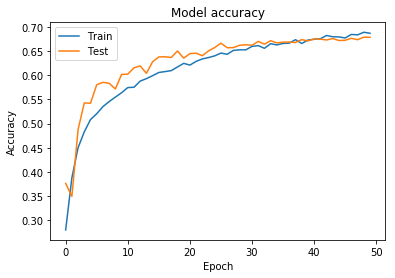

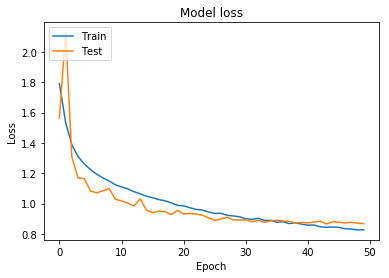

In [84]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_25 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_25 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 128)       512       
__________

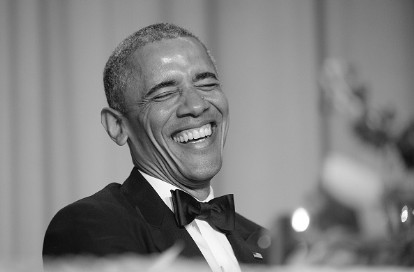

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.42599243, 0.07035094, 0.04044663, 0.41885388, 0.00134647,
        0.04300971]], dtype=float32)

In [86]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/president.obama-birthday-list-414x272.jpg',0)
cv2_imshow(img)
img = cv2.resize(img, (48, 48))
img = np.asarray(img)
img = scaler.fit_transform(img)
img = img.reshape(1,48,48,1)

model.predict(img)


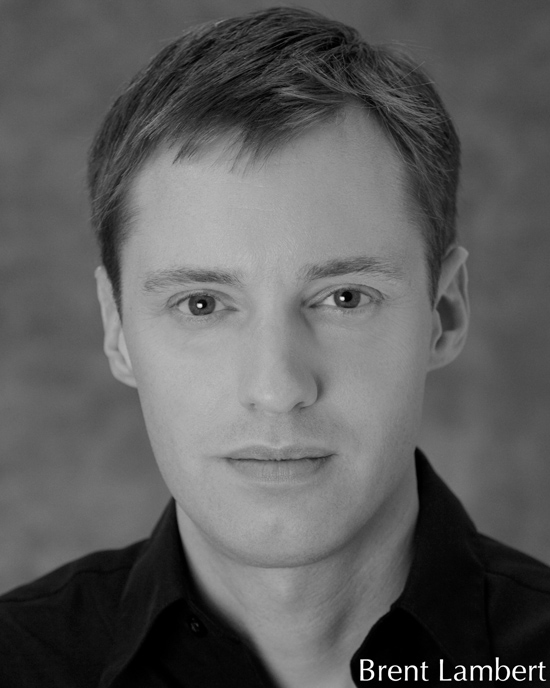

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.69324344, 0.00963774, 0.06471577, 0.08374477, 0.03545599,
        0.11320229]], dtype=float32)

In [90]:
img2 = cv2.imread('/content/neutral.jpg',0)
cv2_imshow(img2)
img2 = cv2.resize(img2, (48, 48))
img2 = np.asarray(img2)
img2 = scaler.fit_transform(img2)
img2 = img2.reshape(1,48,48,1)

model.predict(img2)

In [0]:
# 